In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib import patches
import numpy as np
import radar_utils

# Overall

0
1
2
3
4
5
6
7
8
9
10


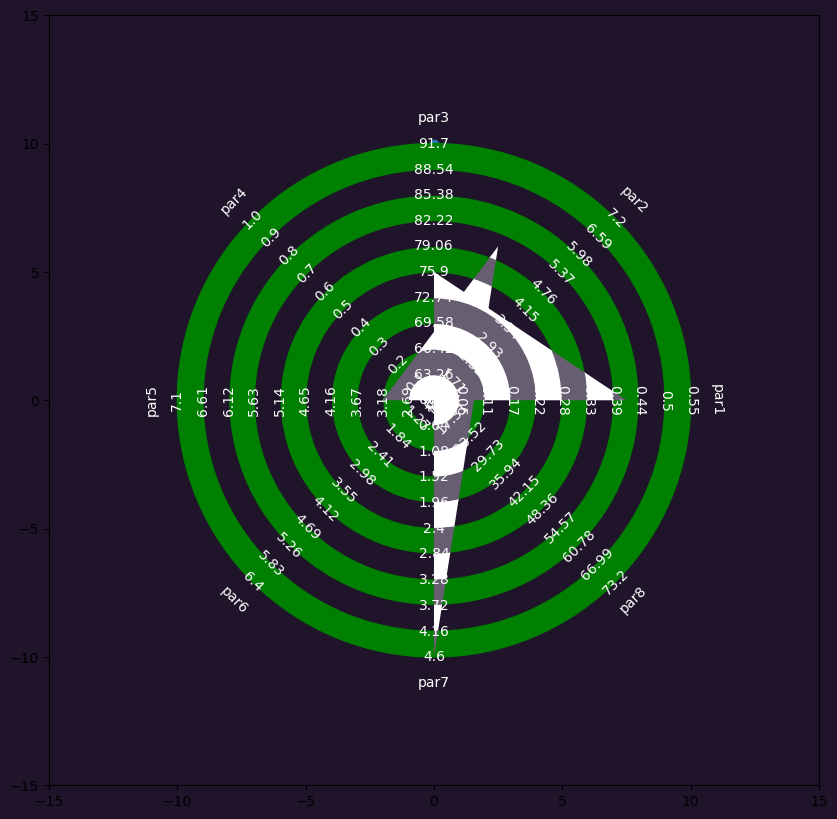

In [80]:
compare = False
background_col='#1f142a'
wedge_colors = ['#1f142a', 'green']
radar_color=['#FFFFFF', '#675E71']
patch_color = '#675E71'
fig, ax = plt.subplots(figsize=(20, 10), facecolor=background_col)
ax.set_facecolor(background_col)
## set axis
ax.set_aspect('equal')
ax.set(xlim=(-15, 15), ylim=(-15, 15))
params = ['par1', 'par2', 'par3', 'par4', 'par5', 'par6', 'par7', 'par8']

ranges = [(0.0, 0.55), (1.1, 7.2), (60.1, 91.7), (0.0, 1), (2.2, 7.1), (0.7, 6.4), (0.2, 4.6), (11.1, 73.2)]

radius = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


vertices = [[0, -10],
           [0, 5],
           [7.5, 0],
           [-2, 0],
           [2.5, 6]]

## add labels around the last circles
# ax = self.__add_labels(params=params, ax=ax)

## add ranges
# ax, xy, range_values = self.__add_ranges(ranges=ranges, ax=ax,)

## get vertices
# vertices = self.__get_vertices(values, xy, range_values)

## make the radar chart
ax = __plot_wedges(ax=ax, compare=compare, radar_color=radar_color, wedge_color=wedge_colors)
ax.scatter(0,10)
ax = __add_labels(ax=ax, params=params)
ax, xy, range_values = __add_ranges(ranges=ranges, ax=ax,)
#print(__add_ranges(ranges=ranges, ax=ax))

## Wedges

In [3]:
def __plot_wedges(ax, radar_color, wedge_color, alpha=None, compare=False):
        """
        Function to plot concentric circles.

        Args:
            ax (axes.Axes): axis object.
            radar_color (list): color values.
            vertices (list): coordinate values for each vertex of the polygon.
            alpha (list, optional): alpha values for colors. Defaults to None.
            compare (bool, optional): True, if a comparison chart is to be made. Defaults to False.

        Returns:
            axes.Axes: axis object.
        """        

        ## radius value for each circle
        radius = [1, 3, 5, 7, 9]

        ## linewidth, zorder for circle
        lw_circle, zorder_circle =  20, 2
        
        if compare:    ## for making comparison radar charts
                ## plot a polygon
                radar_1 = Polygon(vertices, fc=radar_color, zorder=zorder_circle, alpha=alpha)
                ax.add_patch(radar_1)
        else:
                ## plot a polygon
                radar_1 =  Polygon(vertices, fc='pink', zorder=zorder_circle) # -1 
                ax.add_patch(radar_1)
                
        ## create concentric circles 
        for rad in radius:
            ## create circle
            wedge1 = patches.Wedge((0, 0), r=rad, theta1=0, theta2=360, width=1, color=wedge_color[0], zorder=zorder_circle)
            ax.add_patch(wedge1)
            # for radar area
            wedge1_radar = patches.Wedge((0, 0), r=rad, theta1=0, theta2=360, width=1, color=radar_color[0], zorder=zorder_circle+1)
            wedge1_radar.set_clip_path(radar_1)
            ax.add_patch(wedge1_radar)


            if compare == False:
                ## create another circle to fill in second color
                wedge2 = patches.Wedge(center=(0, 0), r=rad+1, theta1 = 0, theta2= 360, width = 1, color=wedge_color[1], zorder=zorder_circle)
                ax.add_patch(wedge2)
                
                wedge2_radar = patches.Wedge(center=(0, 0), r=rad+1, theta1 = 0, theta2= 360, width = 1, color=radar_color[1], zorder=zorder_circle+1)
                wedge2_radar.set_clip_path(radar_1)
                ax.add_patch(wedge2_radar)

        
        return ax

# Labels

In [71]:
def __add_labels(params, ax, return_list=False, radius=11, range_val=False, flip_labels = True):



    ## get coordinates and rotation values
    coord = radar_utils.get_label_coordinates(n=len(params))

    if return_list:
         x_y = []

    for i in range(len(params)):
        rot = coord[i, 2] # = alpha = rotation value for parameter
        x, y = (radius *np.cos(rot), radius*np.sin(rot))


        if return_list == True:
            ## add x_y cordinates 
            tup_temp = (x, y)
            x_y.append(tup_temp)

        
        # adding 180° if y < 0 => on its head
        if y < 0 and flip_labels:
            rot += np.pi
        

        if type(params[i]) == np.float64:
            p = round(params[i], 2)
        else:
            p = params[i]

        ax.text(x, y, p, rotation=np.rad2deg(rot)-90, ha='center', va='center', 
            fontsize=10, fontdict=dict(color='white')) #fontfamily=self.fontfamily, fontdict=dict(color=color)

    if return_list == True:
        return ax, x_y
    else:
        return ax

In [33]:
np.rad2deg(rot) 

468.0

In [67]:
for i, x in enumerate(['A', 'B']):
    print(i)

0
1


# Vertices for Radar Areas

# Ranges

In [ ]:
radius = [2.5, 4.1, 5.8, 7.5, 9.2, 10.9, 12.6, 14.3, 15.9, 17.6]
radius = [3.35, 6.7, 10.05, 13.4, 16.75]

In [79]:
def __add_ranges(ranges, ax):

    # min and max --> range of n values:


    x_y = []
    range_values = np.array([])

    for rng in ranges:
        value = np.linspace(start=rng[0], stop=rng[1], num=11)
        range_values = np.append(range_values, value)

    range_values = range_values.reshape((len(ranges),11))

    #print(range_values)

    for i, r in enumerate(radius):
        print(i)
        ## parameter list
        params = range_values[:, i]

        ax, xy = __add_labels(params=params, ax=ax, return_list=True, radius=r, range_val=True)
        x_y.append(xy)

    return ax, np.array(x_y), range_values

# Endnote

# Titles

In [ ]:
fig, ax = plt.subplots()
patch = patches.Circle((0.5, 0.5), radius=0.25)
ax.add_patch(patch)
patch2= patches.Rectangle((0.5, 0.5), height=0.5, width=0.5, color='red', alpha=0.5)
ax.add_patch(patch2)
patch.set_clip_path(patch2)


In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), facecolor='white')
ax.add_patch(patches.Rectangle((0.5, 0.5), height=0.5, width=0.5, color='red', alpha=1, fill=False, linewidth=10))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax.set(xlim=(0., 1.0), ylim=(0., 1.))
ax.add_patch(patches.Wedge((0.5, 0.5), 0.2, 0, 360, width=0.1, fc='red'))
ax.add_patch(patches.Wedge((0.5, 0.5), 0.4, 0, 360, width=0.1))

In [76]:
radius

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]